In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import torch
import torchvision.transforms as T_transforms
from collections import Counter

In [2]:
images = np.load("data/train_images.npy")
labels = np.load("data/train_labels.npy")
print(np.unique(labels))
print(len(np.unique(labels)))

[0 1 2 3 4 5 6 7 8]
9


In [3]:
'''
Plot images given a numpy array
Input: 
    images: image array
    k: number of images to plot
    pick_random: If pick_random, choose k random images to plot
          
'''

def plot_np(images = None,labels=None,pick_random = False, k  =  5):
    n = len(images)
    plt.figure()
    
    #subplot(r,c) provide the no. of rows and columns
    f, axarr = plt.subplots(1,k) 
    
    for i in range(k):
        
        if not pick_random: index = i
        else:
            indices = []
            index = random.randint(0,n-1)
            while(index not in indices):
                indices.append(index)
                index = random.randint(0,n-1)
        axarr[i].imshow(images[index])
        axarr[i].title.set_text(f"Label: {labels[index].item()}")

    

<Figure size 432x288 with 0 Axes>

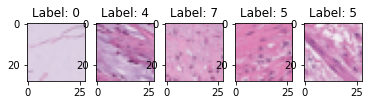

In [4]:
plot_np(images,labels,k=5)

In [5]:
from supervised_exp.dataset import pathDataset
from torch.utils.data import Dataset, DataLoader

dataset =  pathDataset()
print(f"Length of {dataset.split} dataset: {len(dataset)}")

dataloader = DataLoader(dataset, batch_size=4,shuffle=False)
imgs,lbls = iter(dataloader).next()
print(f"Image Shape: {imgs.shape}")

Length of train dataset: 89996
Image Shape: torch.Size([4, 3, 28, 28])


In [6]:
'''
Get mean and std of train_set
See Discussion Thread: https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/4
'''

def calc_mean_std(dataloader,img_size=28):
    
    mean = 0.0
    
    for images, _ in dataloader:
        batch_samples = images.size(0) 
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        
    mean = mean / len(dataloader.dataset)

    var = 0.0
    for images, _ in dataloader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        var += ((images - mean.unsqueeze(1))**2).sum([0,2])
    std = torch.sqrt(var / (len(dataloader.dataset)*img_size*img_size))
    return mean,std

In [7]:
mean,std = calc_mean_std(dataloader)

In [8]:
print(f"Training dataset mean: {mean}")
print(f"Training dataset std: {std}")

Training dataset mean: tensor([0.7405, 0.5330, 0.7058])
Training dataset std: tensor([0.1237, 0.1768, 0.1244])


In [9]:
percent,n = 0.1,len(dataset)
train_size,unlabel_size = int(n*percent),n - int(n*percent)
train_set,unlabel_set = torch.utils.data.random_split(dataset,[train_size,unlabel_size],
                                                      generator=torch.Generator().manual_seed(1598))

In [10]:
train_classes = [label.item() for _, label in train_set]
print(f"Train Classes Distribution: {Counter(train_classes)}")
unlabel_classes = [label.item() for _, label in unlabel_set]
print(f"Unlabel Classes Distribution: {Counter(unlabel_classes)}")

Train Classes Distribution: Counter({8: 1275, 5: 1216, 2: 1067, 3: 1021, 0: 985, 1: 955, 7: 895, 6: 812, 4: 773})
Unlabel Classes Distribution: Counter({8: 11610, 5: 10966, 3: 9380, 2: 9293, 1: 8554, 7: 8506, 0: 8381, 4: 7233, 6: 7074})


In [12]:
from supervised_exp.dataset import get_dataset
dataset = get_dataset(root_dir = "data")

In [13]:
train_set = dataset["train_set"]
train_classes = [label.item() for _, label in train_set]
print(f"Train Classes Distribution: {Counter(train_classes)}")

Train Classes Distribution: Counter({8: 1275, 5: 1216, 2: 1067, 3: 1021, 0: 985, 1: 955, 7: 895, 6: 812, 4: 773})
